In [46]:
import seaborn as sns
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pyleoclim as pyleo
import lipd
from palettable.colorbrewer.qualitative import Dark2_8
%matplotlib inline

In [29]:
# study sites
sites=['Dongge','Heshang','Jiuxian','Sanbao','Lianhua','Tianmen']

In [40]:
# names of stalagmites used for each site
enames={}
enames['Jiuxian']='C9961'
enames['Sanbao']='SB43'
enames['Heshang']='HS4'
enames['Lianhua']='LH-2'
enames['Dongge']='DA'
enames['Tianmen']='TM-18a'

In [41]:
for site in sites:
    ld=lipd.readLipd(site+'.lpd')

    lipd_m = lipd.getMetadata(ld)

    #read lat,lon
    geo[site]={}
    geo[site]['lat']=lipd_m['geo']['geometry']['coordinates'][1]
    geo[site]['lon']=lipd_m['geo']['geometry']['coordinates'][0]

    entity=enames[site]
    var_all[site]={}

    # read variables in paleoTable
    ts = lipd.extractTs(ld, whichtables="meas", mode="paleo")
    new_ts = lipd.filterTs(ts, 'paleoData_notes == '+entity)

    for var in ['depth','age','d18o']:
        var_tmp=lipd.filterTs(new_ts,'paleoData_variableName == '+var)
        var_all[site][var]=var_tmp[0]['paleoData_values']

    # read variables in chronTable
    ts = lipd.extractTs(ld, whichtables="meas", mode="chron")
    new_ts = lipd.filterTs(ts, 'chronData_notes == '+entity)

    for var in ['depth_dating','corr_age','corr_age_uncert']:
        var_tmp=lipd.filterTs(new_ts,'chronData_variableName == '+var)
        var_all[site][var]=var_tmp[0]['chronData_values']

Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Dongge.lpd
Finished read: 1 record
extracting paleoData...
extracting: Dongge.Wang.2005
Created time series: 14 entries
Found 14 matches from 14 columns
Found 1 matches from 14 columns
Found 1 matches from 14 columns
Found 1 matches from 14 columns
extracting chronData...
extracting: Dongge.Wang.2005
Created time series: 14 entries
Found 14 matches from 14 columns
Found 1 matches from 14 columns
Found 1 matches from 14 columns
Found 1 matches from 14 columns
Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Heshang.lpd
Finished read: 1 record
extracting paleoData...
extracting: Heshang.Hu.2008
Created time series: 14 entries
Found 14 matches from 14 columns
Found 1 matches from 14 columns
Found 1 matches from 14 columns
Found 1 matches from 14 columns
extracting chronData...
extracting: Heshang.Hu.2008
Created time series: 14 entries
Found 14 matches from 14 columns
Fou

In [53]:
# Get insolation from the Python package climlab
from climlab import constants as const
from climlab.solar.insolation import daily_insolation
from climlab.solar.orbital import OrbitalTable

kyears = np.linspace(-11, 0, 1001 ) # thousands of years
table = OrbitalTable()
orb = table.lookup_parameters( kyears )

# generate JJA insolation for all sites
insol={}
for site in sites:
    lat=geo[site]['lat']
    days = np.linspace(0, const.days_per_year, 365)
    Q = daily_insolation([lat], days, orb)
    # Julian days 152-243 are JJA
    insol[site]= np.mean(Q[151:243,:], axis=0)

Cannot import compiled Fortran extension, CAM3 module will not be functional.
Cannot initialize the CAM3 module.
Cannot import and initialize compiled Fortran extension, RRTMG_LW module will not be functional.
Cannot import and initialize compiled Fortran extension, RRTMG_SW module will not be functional.
Cannot import EmanuelConvection fortran extension, this module will not be functional.
Loading Berger and Loutre (1991) orbital parameter data from file /Users/hujun/miniconda3/envs/pyleoclim/lib/python3.6/site-packages/climlab/solar/orbit91


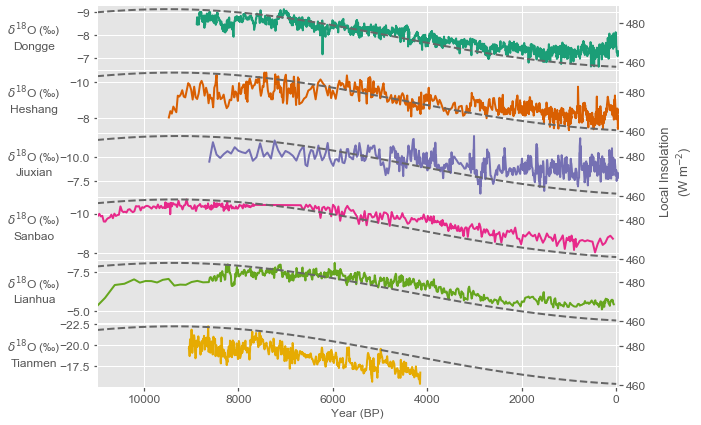

In [61]:
plt.style.use('ggplot')
fig, axs = plt.subplots(6, 1, figsize=(10, 7),sharex=True)
fig.subplots_adjust(hspace=0.001)

i=0
for site in sites:
    axs[i].plot(var_all[site]['age'],var_all[site]['d18o'],color=Dark2_8.mpl_colors[i])
    ax2 = axs[i].twinx()
    ax2.plot(np.linspace(11000, 0, 1001),insol[site],color = Dark2_8.mpl_colors[7],linestyle='dashed')
    if i==2:
        ax2.set_ylabel('Local Insolation\n'+r'(W m$^{-2}$)',rotation=90,fontsize=13)
    ax2.yaxis.set_label_coords(1.08, 0.4)
    ax2.tick_params(axis='both', which='major', labelsize=12)
    ax2.grid(False)
    axs[i].set_xlabel('Year (BP)')
    axs[i].set_ylabel(u'$\delta^{18}$O (\u2030)'+'\n'+site,rotation=0,fontsize=12)
    axs[i].tick_params(axis='both', which='major', labelsize=12)
    axs[i].set_xlim(-50,11000)
    #start, end = axs[i].get_ylim()
    #axs[i].yaxis.set_ticks(np.arange(start, end, 2))
    axs[i].invert_xaxis()
    axs[i].invert_yaxis()
    axs[i].yaxis.set_label_coords(-0.12, 0.3)
    i = i+1
plt.subplots_adjust(right=0.85)   
fig.savefig('Chinese_speleothems_Holocene.pdf',dpi=300,bbox_inches='tight')